# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Import visualization libraries and set %matplotlib inline. **

** Read in the csv file as a dataframe called df **

In [ ]:
df= pd.read_csv('/content/911.csv')

** Check the info() of the df **

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [ ]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [ ]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [ ]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [ ]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [ ]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS


** What is the most common Reason for a 911 call based off of this new column? **

In [ ]:
df['Reason'].value_counts().head(3)

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

<ipython-input-23-50839355cbff>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Count of Reasons')

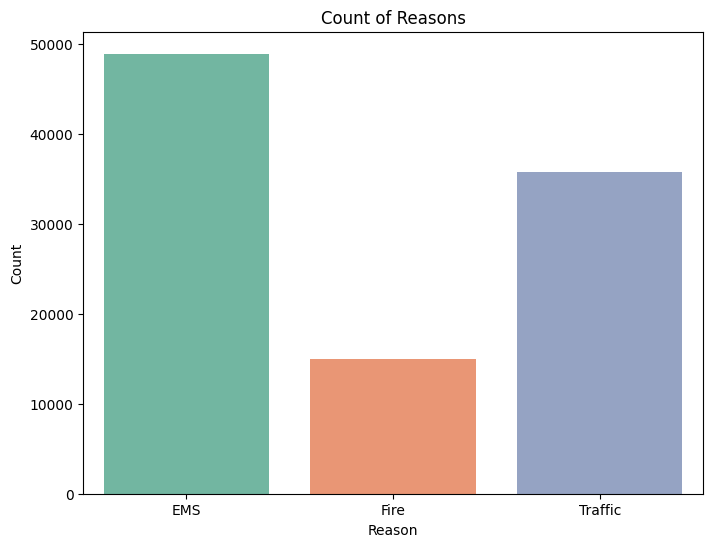

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Reason',palette='Set2')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.title('Count of Reasons')

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [ ]:
df['timeStamp'].dtype

dtype('O')

 These timestamps are still strings. Using [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.

In [ ]:
df['timeStamp']= pd.to_datetime(df['timeStamp'])
df['Date'] = df['timeStamp'].dt.date


You can now grab specific attributes from a Datetime object by calling them. For example:**


 exploring the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.

In [ ]:
df['month']= df['timeStamp'].dt.month
df['Year']= df['timeStamp'].dt.year
df['Day']= df['timeStamp'].dt.day
df['Day_name'] = df['timeStamp'].dt.day_name()
df['Hour'] = df['timeStamp'].dt.hour
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Date,month,Year,Day,Day_name,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10,12,2015,10,Thursday,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10,12,2015,10,Thursday,17


** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

Text(0.5, 1.0, 'Days vs Enquiry ')

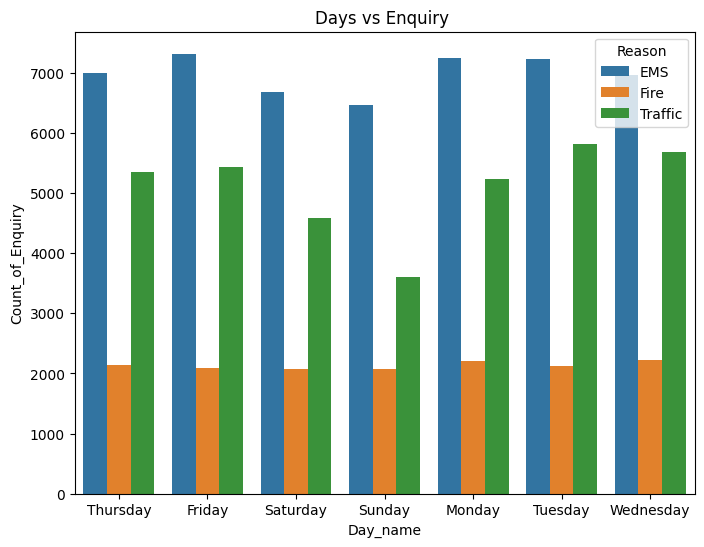

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Day_name',hue='Reason')
plt.xlabel('Day_name')
plt.ylabel('Count_of_Enquiry')
plt.title('Days vs Enquiry ')

**Now do the same for Month:**

Text(0.5, 1.0, 'Month vs Enquiry ')

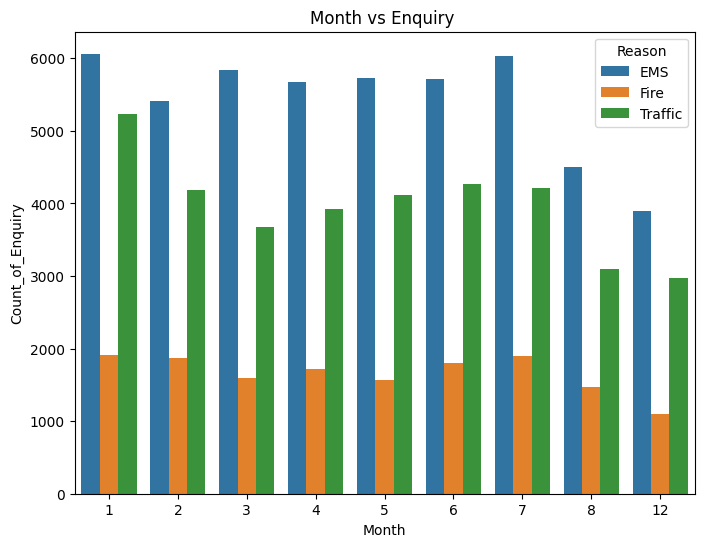

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='month',hue='Reason')
plt.xlabel('Month')
plt.ylabel('Count_of_Enquiry')
plt.title('Month vs Enquiry ')



_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

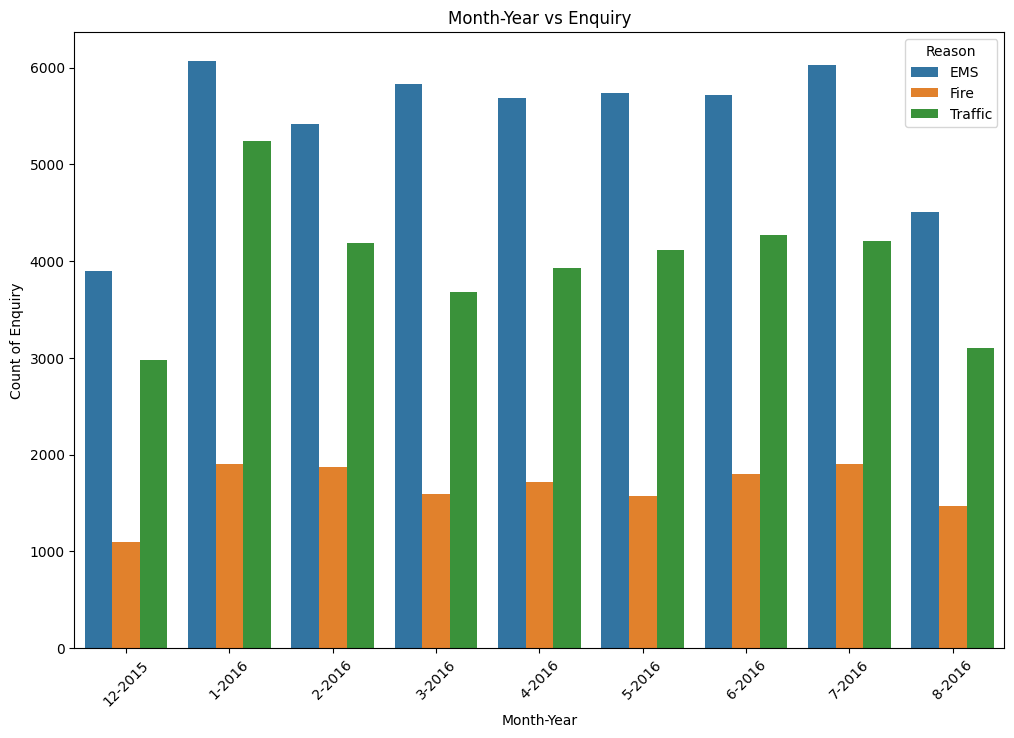

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Combine 'Month' and 'Year' into a single column
df['Month_Year'] = df['month'].astype(str) + '-' + df['Year'].astype(str)
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Month_Year', hue='Reason')
plt.xlabel('Month-Year')
plt.ylabel('Count of Enquiry')
plt.title('Month-Year vs Enquiry')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [ ]:
import pandas as pd
byMonth = df.groupby('month').count().reset_index()
byMonth.head()

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Date,Year,Day,Day_name,Hour,Month_Year
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

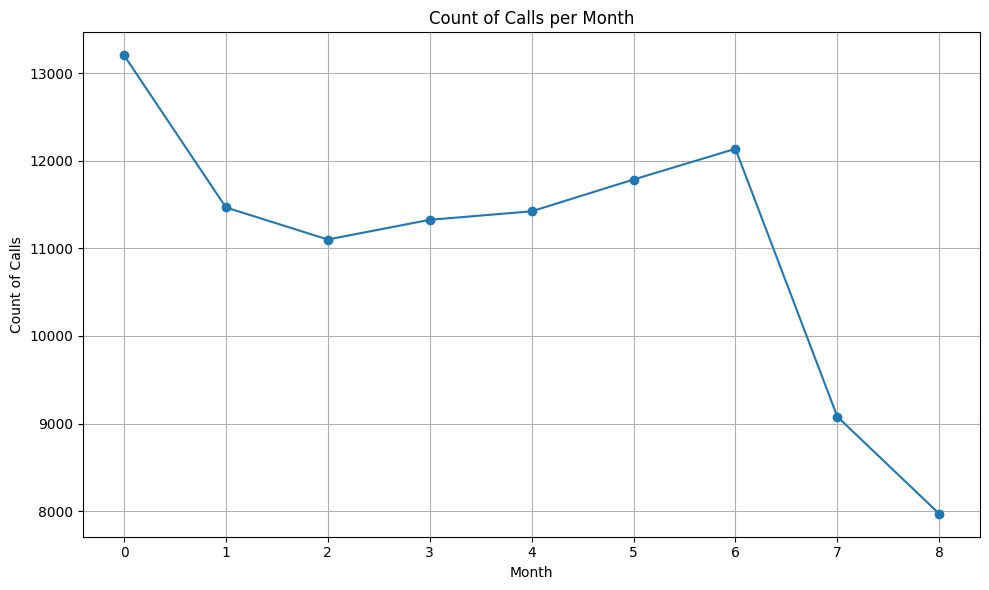

In [ ]:
import matplotlib.pyplot as plt
byMonth['title'].plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Count of Calls')
plt.title('Count of Calls per Month')
plt.grid(True)
plt.tight_layout()
plt.show()


** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month.

<Figure size 600x400 with 0 Axes>

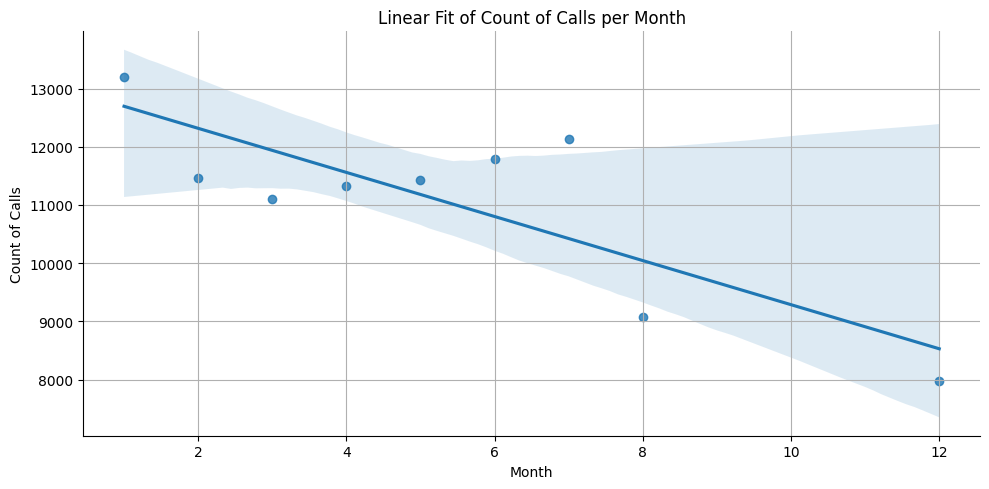

In [ ]:
plt.figure(figsize=(6, 4))
sns.lmplot(data=byMonth, x='month', y='title', aspect=2)
plt.xlabel('Month')
plt.ylabel('Count of Calls')
plt.title('Linear Fit of Count of Calls per Month')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

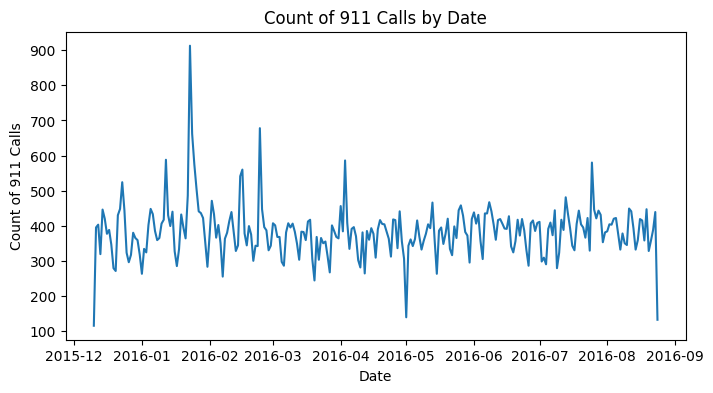

In [ ]:
plt.figure(figsize=(8, 4))
sns.lineplot(df.groupby('Date').count()['twp'],)
plt.xlabel('Date')
plt.ylabel('Count of 911 Calls')
plt.title('Count of 911 Calls by Date')
plt.show()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

Text(0.5, 1.0, 'Fire Calls by Date')

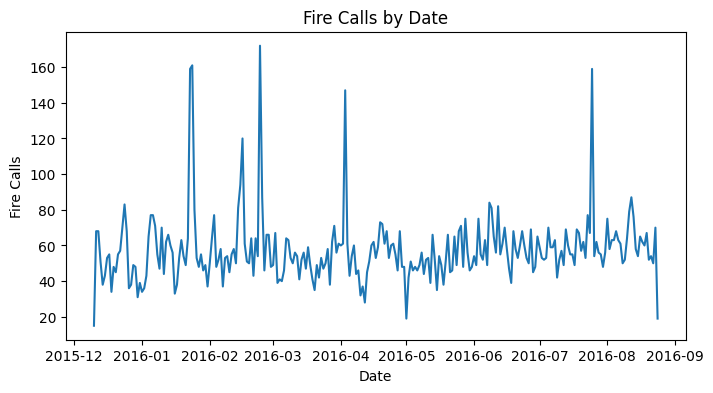

In [ ]:
fire_enquiries = df[df['Reason'] == 'Fire'].groupby('Date').count().reset_index()
plt.figure(figsize=(8, 4))
sns.lineplot(data=fire_enquiries, x='Date', y='twp')
plt.xlabel('Date')
plt.ylabel('Fire Calls')
plt.title('Fire Calls by Date')



Text(0.5, 1.0, 'Traffic Calls by Date')

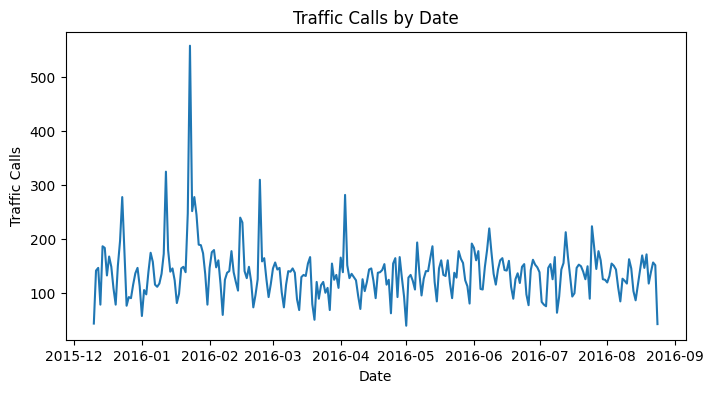

In [ ]:
Traffic_enquiries = df[df['Reason'] == 'Traffic'].groupby('Date').count().reset_index()
plt.figure(figsize=(8, 4))
sns.lineplot(data=Traffic_enquiries, x='Date', y='twp')
plt.xlabel('Date')
plt.ylabel('Traffic Calls')
plt.title('Traffic Calls by Date')


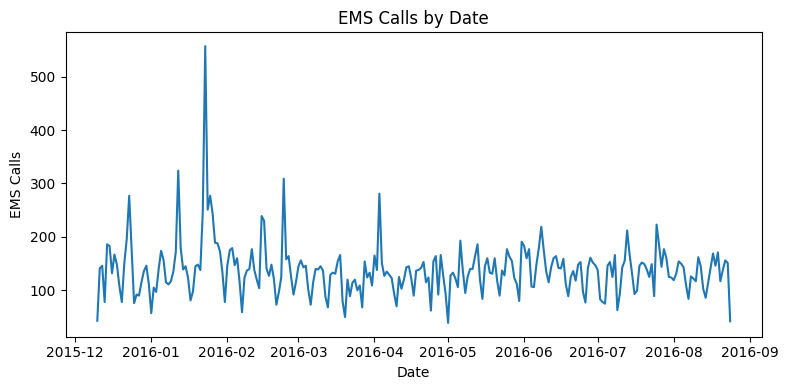

In [ ]:
EMS_enquiries = df[df['Reason'] == 'Traffic'].groupby('Date').count().reset_index()
plt.figure(figsize=(8, 4))
sns.lineplot(data=EMS_enquiries, x='Date', y='twp')
plt.xlabel('Date')
plt.ylabel('EMS Calls')
plt.title('EMS Calls by Date')
plt.tight_layout()
plt.show()

In [ ]:
Day_enquiries = df.groupby('Day_name').count()
Day_Hour_enquiries = df.groupby(by=['Day_name','Hour']).count()['Reason'].unstack()
Day_Hour_enquiries


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_name,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Monday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tuesday,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wednesday,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


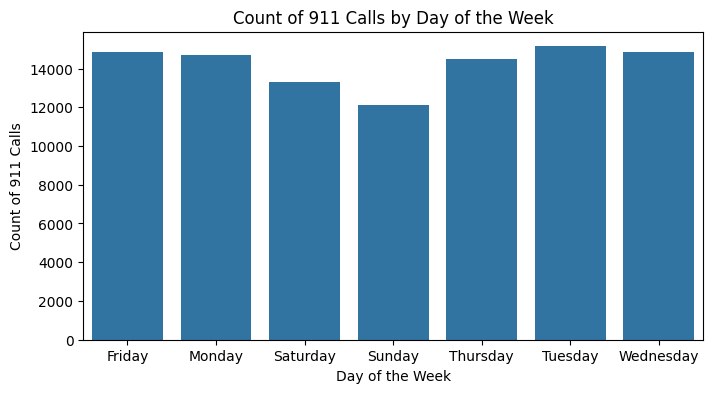

In [ ]:
plt.figure(figsize=(8, 4))
Day_hour = df.groupby('Day_name').count()
sns.barplot(x=Day_hour.index, y='twp', data=Day_hour)
plt.xlabel('Day of the Week')
plt.ylabel('Count of 911 Calls')
plt.title('Count of 911 Calls by Day of the Week')
plt.show()


____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

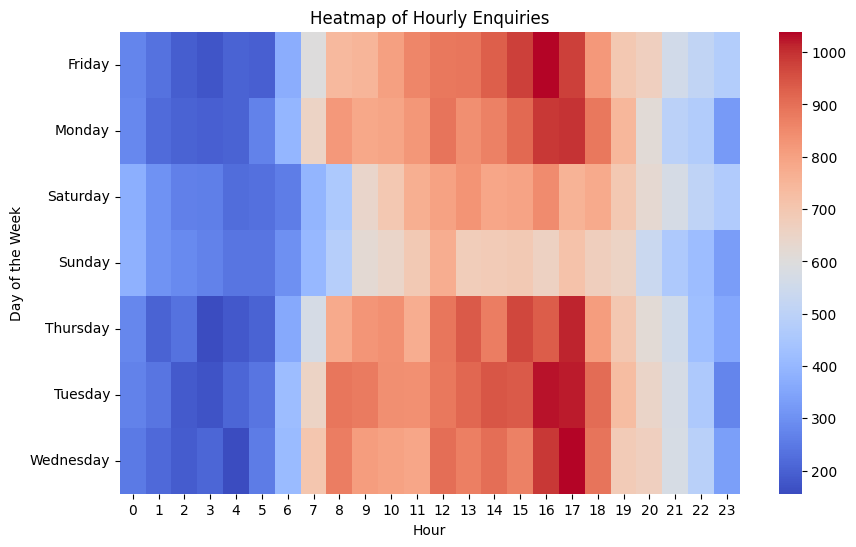

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(Day_Hour_enquiries, cmap='coolwarm')
plt.title('Heatmap of Hourly Enquiries')
plt.xlabel('Hour')
plt.ylabel('Day of the Week')
plt.show()

** Now create a clustermap using this DataFrame. **

<Figure size 1000x600 with 0 Axes>

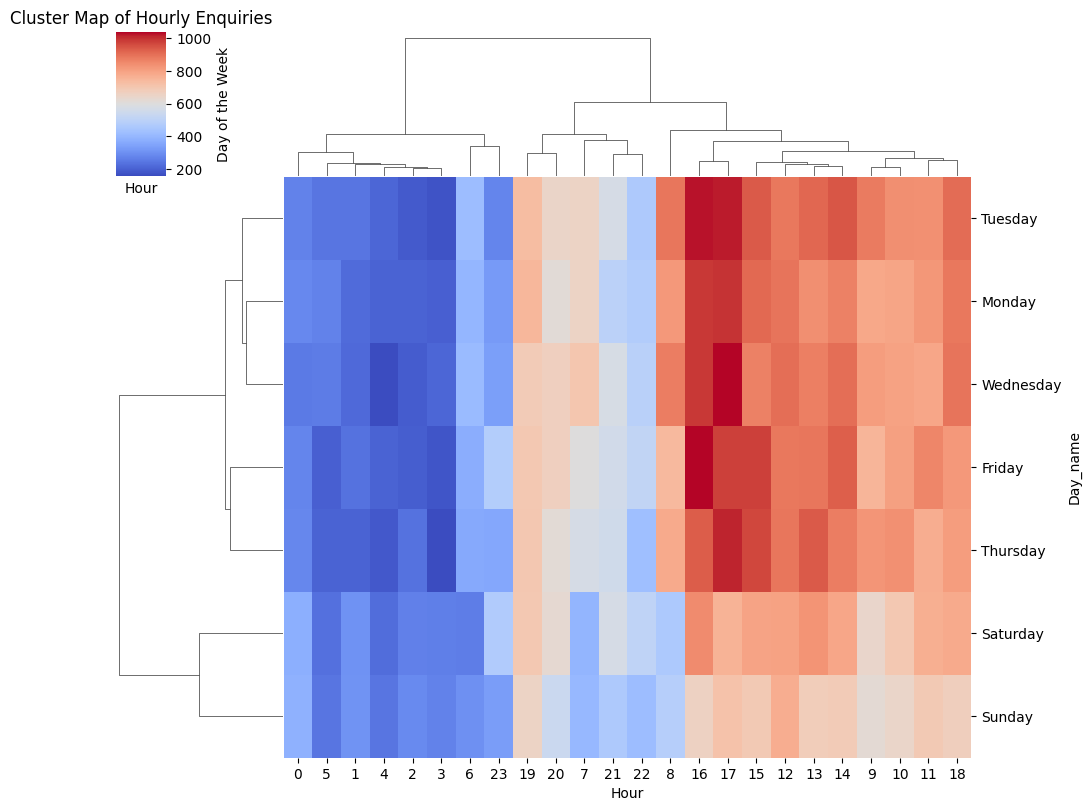

In [ ]:
plt.figure(figsize=(10, 6))
sns.clustermap(Day_Hour_enquiries, cmap='coolwarm', figsize=(10, 8))
plt.title('Cluster Map of Hourly Enquiries')
plt.xlabel('Hour')
plt.ylabel('Day of the Week')
plt.show()

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [ ]:
Day_month_enquiries = df.groupby(by=['Day_name','month']).count()['Reason'].unstack()
Day_month_enquiries

month,1,2,3,4,5,6,7,8,12
Day_name,,,,,,,,,
Friday,1970,1581,1525,1958,1730,1649,2045,1310,1065
Monday,1727,1964,1535,1598,1779,1617,1692,1511,1257
Saturday,2291,1441,1266,1734,1444,1388,1695,1099,978
Sunday,1960,1229,1102,1488,1424,1333,1672,1021,907
Thursday,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tuesday,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wednesday,1700,1903,1889,1517,1538,2058,1717,1295,1262


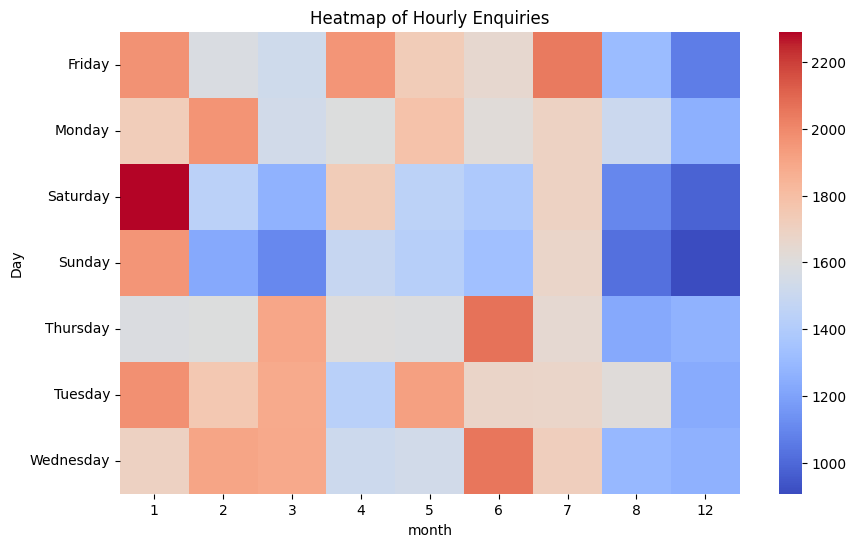

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(Day_month_enquiries, cmap='coolwarm')
plt.title('Heatmap of Hourly Enquiries')
plt.xlabel('month')
plt.ylabel('Day')
plt.show()